In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf


In [3]:
stock_data = yf.download('AAPL', start='2024-01-01', end='2024-12-30')


stock_data.head(10)

/tmp/ipython-input-4072943332.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download('AAPL', start='2024-01-01', end='2024-12-30')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.290421,187.070068,182.553143,185.789438,82488700
2024-01-03,182.910538,184.528693,182.096492,182.880757,58414500
2024-01-04,180.587524,181.758939,179.565014,180.825770,71983600
2024-01-05,179.862823,181.431339,178.860172,180.666948,62379700
2024-01-08,184.210999,184.250716,180.180517,180.766224,59144500
2024-01-09,183.794067,183.803989,181.401584,182.582935,42841800
2024-01-10,184.836426,185.044891,182.582924,183.009806,46792900
2024-01-11,184.240784,185.690176,182.285104,185.183874,49128400


### Apple Data plot

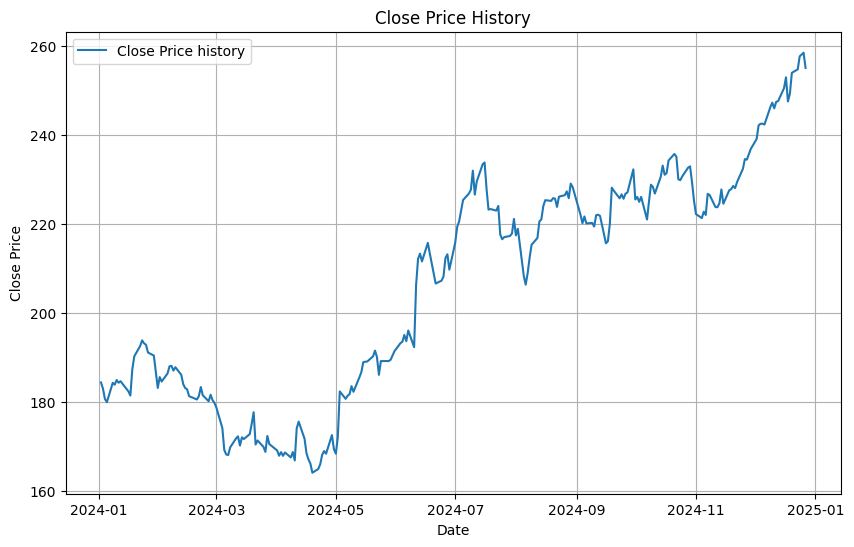

In [4]:
plt.figure(figsize=(10,6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price history')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

### Smoothing Methods


### Double Exponential Smoothing (holt's linear trend model)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


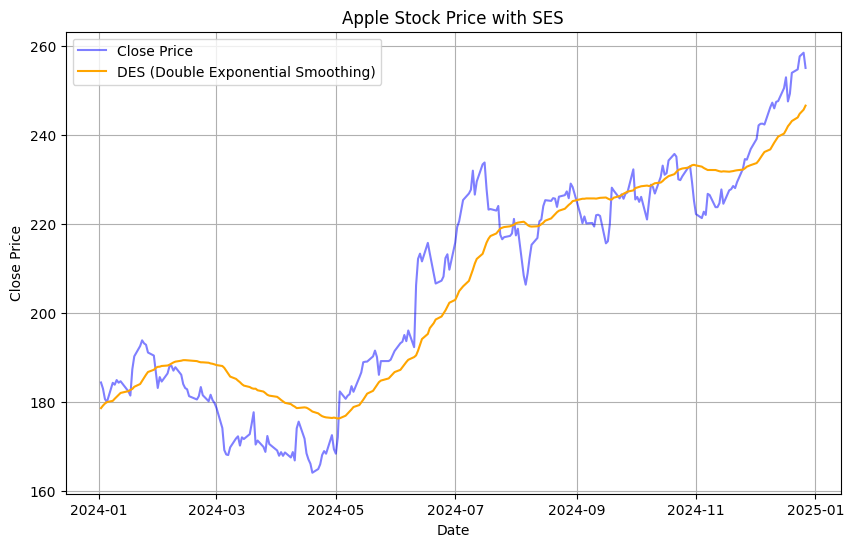

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


close_prices = stock_data['Close']
## Double Exponential Smooothing - Holt's Linear trend model
des_model = ExponentialSmoothing(close_prices, trend='add').fit(smoothing_level=0.05)
stock_data['DES'] = des_model.fittedvalues



## plotting
plt.figure(figsize=(10,6))
plt.plot(stock_data['Close'], label="Close Price", color='blue', alpha=0.5)
plt.plot(stock_data['DES'], label='DES (Double Exponential Smoothing)', color='orange')


plt.title('Apple Stock Price with SES')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

### end here!